<a href="https://colab.research.google.com/github/mohammed1faisal/apparel-sales_python/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Amazon Sale Report.csv to Amazon Sale Report.csv
User uploaded file "Amazon Sale Report.csv" with length 19056233 bytes


In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df=pd.read_csv('Amazon Sale Report.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

Deleting the null values from the data set

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(37514, 19)

converting the data type of some columns to the desired data type

In [ ]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')


In [ ]:
df['ship-postal-code'].dtype

dtype('int64')

Renaming the column so that so that it emables ease in doing analysis.

In [ ]:
df.rename(columns={'Qty':'Quantity'}, inplace = True)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df.describe()

,index,Quantity,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [ ]:
df.describe(include= 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [ ]:
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


**Find the most prefered/selling size**

<Axes: xlabel='Size', ylabel='count'>

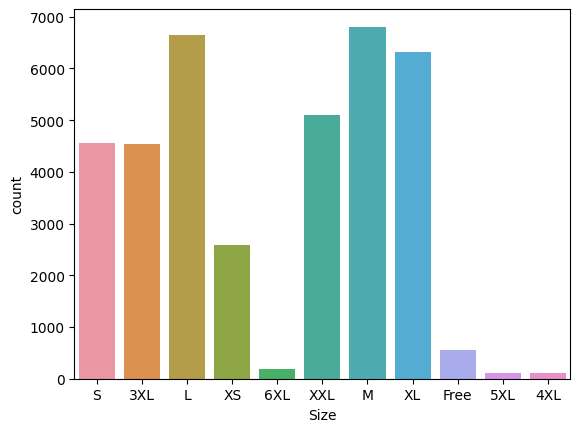

In [ ]:
ax=sns.countplot(x='Size', data=df)

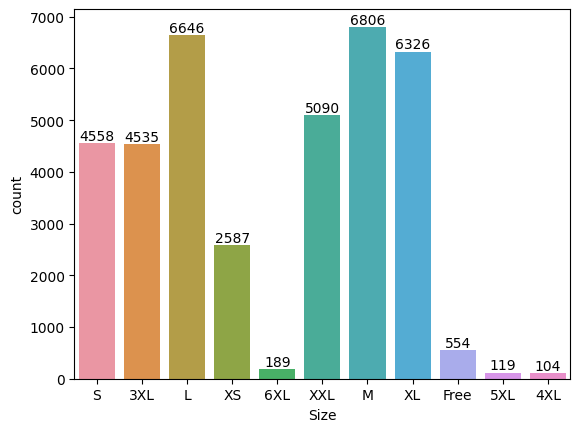

In [ ]:
ax=sns.countplot(x='Size', data=df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Size', ylabel='Quantity'>

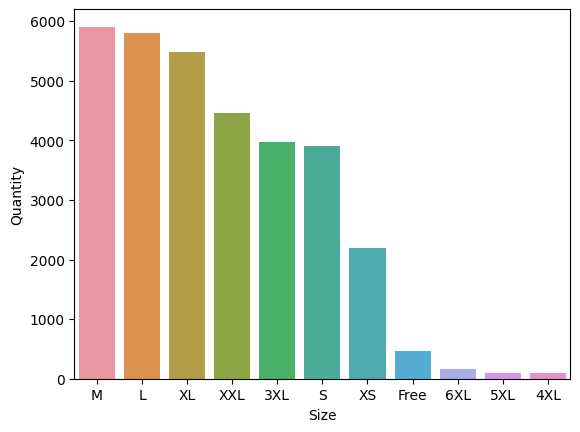

In [ ]:
sh= df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='Size', y ='Quantity',data=sh)

**FROM THE ABOVE GRAPH WE CAN INFER THAT MAXIMUM SALE IS FOR THE SIZE M FOLLOWED BY THE SIZE L AND THEN SIZE XL**

<Axes: >

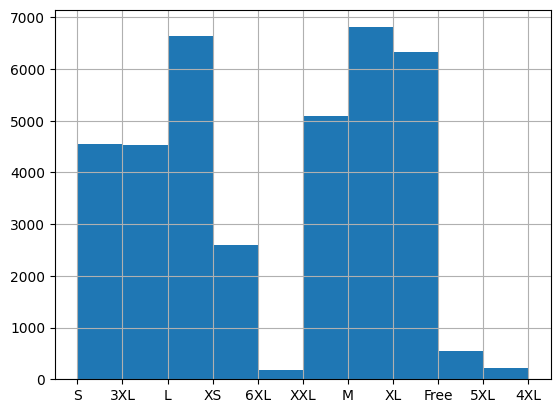

In [ ]:
df['Size'].hist()

**FIND OUT THE MOST SELLING CLOTHING PRODUCT.**

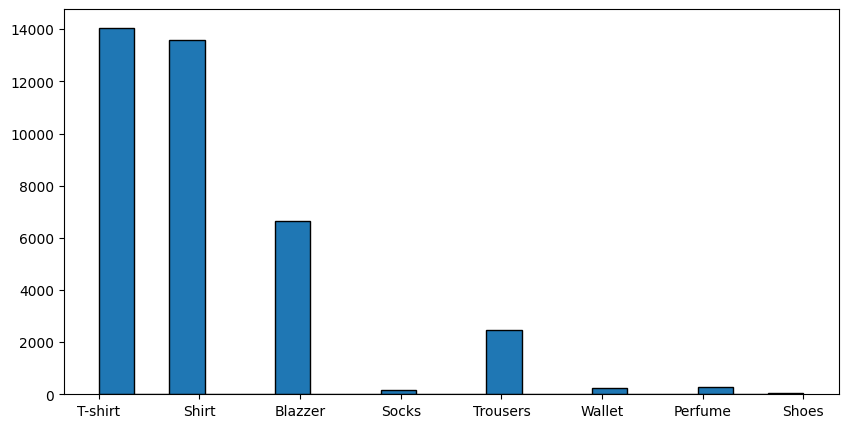

In [ ]:
df['Category']= df['Category'].astype(str)
column_data=df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=20, edgecolor='black')
plt.show()

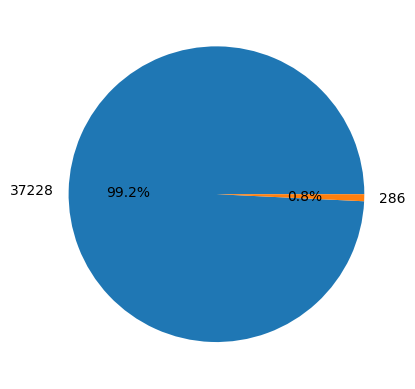

In [ ]:
b2b=df['B2B'].value_counts()
plt.pie(b2b,labels=b2b, autopct='%1.1f%%')
plt.show()

**SIZES OF VARIOUS GARMENTS AVAILABLE**

<function matplotlib.pyplot.show(close=None, block=None)>

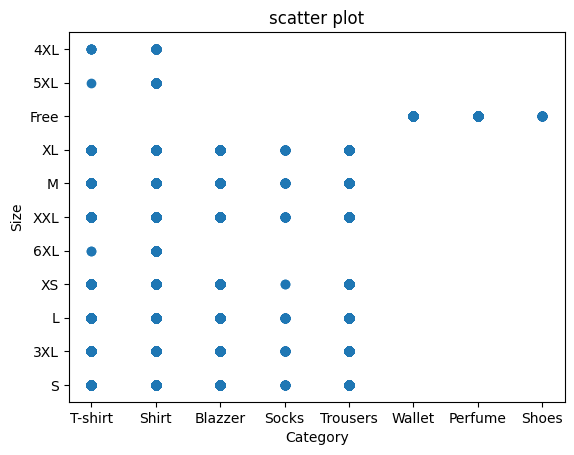

In [ ]:
x=df['Category']
y=df['Size']
plt.scatter(x,y)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('scatter plot')
plt.show

**FINDING THE STATE WHICH HAS MORE SALES**

<function matplotlib.pyplot.show(close=None, block=None)>

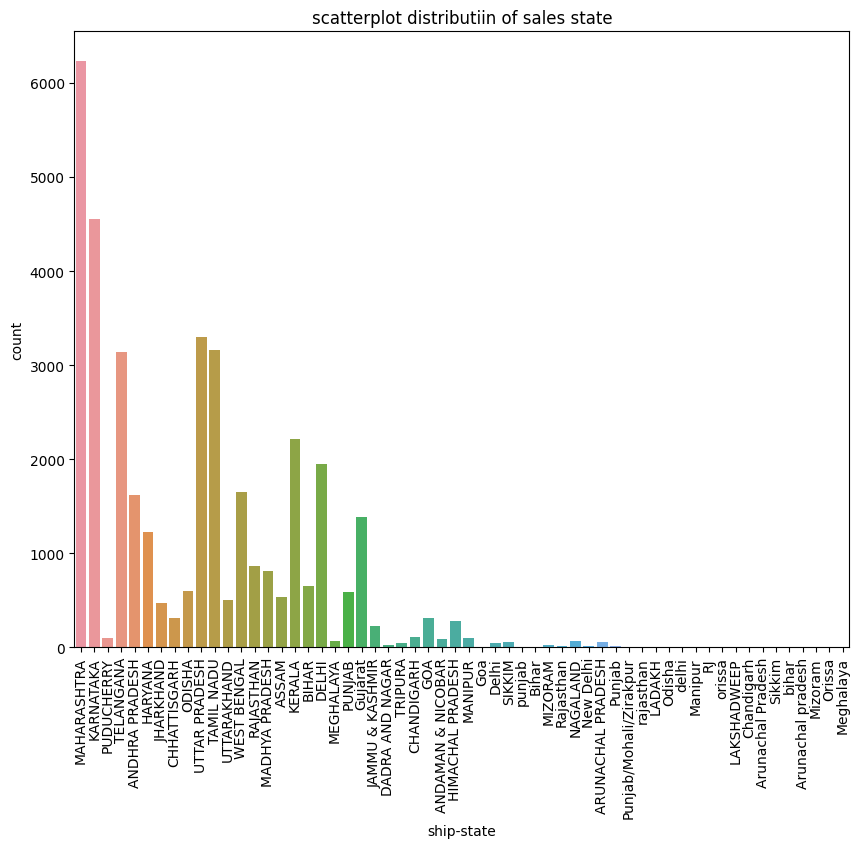

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df , x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('scatterplot distributiin of sales state')
plt.xticks(rotation=90)
plt.show

**THE DATA ANALYSIS REVELS THAT THE BUSINESS HAS A SIGNIFICANT BASE IN THE STATE OF MAHARASTRA MANINLY SERVING THE RETAIL CUSTOMERS, EXPERIENCING HIGH DEMAND FOR T SHIRTS WITH THE PREFERED SIZE OF M AMONG BUYERS**